## **MLPP25 // Assignment #3**

assigned : **Feb 25, 2025**

DUE : **Mar 3, 2025 11:59pm**

## Zip Codes Business Patterns: economic trends across geographies

<img src="https://larrylittlefield.files.wordpress.com/2017/08/retsmall2015new.png" width=300>

---

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do, bear in mind that such models <u>often</u> yield incorrect solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

---

*Your goal for this assignment will be to identify spatio-temporal trends in the number of businesses per zip code in NYC over the time period of 2000-2012 using [zipcode business patterns (ZBP)](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html) data.*

<br>


### **PART 1 - Loading and visualizing the data**

<b> Load the pre-cleaned NYC zipcode business patterns data (in the `mlpp25/data/zbp/` folder) into a pandas DataFrame. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
import numpy as np
fname ='/content/drive/Shareddrives/mlpp25/data/zbp/nyc_zbp_est_total_2000_2012_clean.csv'
Nzbp = pd.read_csv(fname)
Nzbp.head()

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,-73.996930,40.750213
1,10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,-73.985677,40.716152
2,10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,-73.988850,40.731947
3,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.012847,40.703472
4,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.040777,40.698767


Note that this DataFrame has the zipcode, number of establishments in a given year from 2000 to 2012, and the latitude/longitude of the zip codes.


<b>Make a heat map of the raw NYC timeseries data using `plotly's` `imshow()` function making sure to set the limits of the colorbar to be 0 to 3000$^{\dagger}$, using `"viridis"` as the color map, and making sure to label the colorbar and your axes appropriately.</b>

<small>$^{\dagger}$ this means that the values $\leq0$ will have the lowest color value in your heat map and values $\geq3000$ will have the maximum color value in your heat map.

In [47]:
import plotly.express as px
import plotly.graph_objects as go


years = [col for col in Nzbp.columns if 'N_est' in col]
zip_codes = Nzbp["zip"].astype(str).tolist()
heatmap_data = Nzbp[years].values.astype(float)

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data,
    x=[str(year) for year in range(2000, 2013)],
    y=zip_codes,
    colorscale="viridis",
    zmin=0,
    zmax=3000,
    colorbar=dict(title="Establishments"),
    hovertemplate="Year: %{x}<br>ZIP Code: %{y}<br>Establishments: %{z}<extra></extra>"
))

fig.update_layout(
    title="Heatmap of NYC Business Establishments (2000-2012)",
    xaxis_title="Year",
    yaxis_title="ZIP Code",
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(13)),
        ticktext=[str(year) for year in range(2000, 2013)]
    )
)


fig.show()


<b> Is this heat map informative?  Why or why not?  What information can you glean from it? </b>

Yes,This heatmap provides useful insights

The heatmap shows the distribution of business establishments across NYC ZIP codes from 2000 to 2012, with yellow indicating higher concentrations in areas like 10001, 10012, and 10023. It reveals trends over time, highlighting fluctuations in some ZIP codes while others maintain consistent activity. Higher business density appears in lower ZIP codes, likely representing commercial hubs, while darker regions suggest residential or less developed areas.

<b> Standardize the NYC values across features (time steps).  Generate a new heatmap like above but with color limits -2 to 2. </b>

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_heatmap_data = scaler.fit_transform(heatmap_data)

fig = go.Figure(data=go.Heatmap(
    z=standardized_heatmap_data,
    x=[str(year) for year in range(2000, 2013)],
    y=zip_codes,
    colorscale="viridis",
    zmin=-2,
    zmax=2,
    colorbar=dict(title="Standardized Establishments"),
    hovertemplate="Year: %{x}<br>ZIP Code: %{y}<br>Standardized Value: %{z:.2f}<extra></extra>"
))


fig.update_layout(
    title="Standardized Heatmap of NYC Business Establishments (2000-2012)",
    xaxis_title="Year",
    yaxis_title="ZIP Code"
)

fig.show()


<b> Is this NEW heat map informative?  Why or why not?  What information can you glean from it?  Is there a trend across zipcodes that can be discerned here?  Are there multiple trends? </b>

Yes, The standardized heatmap provides a clearer comparison across ZIP codes over time by normalizing values

The standardized heatmap reveals **relative business activity** across NYC ZIP codes, highlighting areas with above-average (yellow) and below-average (purple) business presence. ZIP codes like **10001, 10012, and 10023** consistently exhibit high activity. Over time, some ZIP codes maintain steady business density, indicating **long-term business hubs**, while others show fluctuations, reflecting **economic shifts**. Lower ZIP codes, likely commercial districts, generally have **higher standardized values**, reinforcing their economic importance. Gradual color shifts suggest **business growth or decline trends** in specific areas.



Some ZIP codes consistently show high business activity, while others exhibit growth trends or declines over time. Certain areas remain stable, whereas others undergo gradual economic shifts, reflecting localized trends.

### **PART 2 - Clustering NYC data**

<b> Using scikit-learn's `KMeans` model, cluster the standardized NYC data into 4 clusters setting `random_state` equal to 2. </b>

In [49]:
from sklearn.cluster import KMeans

num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=2, n_init=10)
cluster_labels = kmeans.fit_predict(standardized_heatmap_data)

Nzbp["Cluster"] = cluster_labels


<b> Make a four panel plot, one for each cluster center, showing the cluster center and its members.   Put the number of zipcodes belonging to that cluster as the title of each panel. Make sure to use proper values for the x-axis and axis labels for the axes.  To make this plot you may use either `matplotlib` <small>(see [this stackoverflow question](https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib) for an example if you do)</small> or `plotly` <small>(this [stackoverflow question](https://stackoverflow.com/questions/65696083/is-there-a-way-to-use-plotly-express-to-show-multiple-subplots) might be helpful)</small>.</b>

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cluster_centers = kmeans.cluster_centers_

fig = make_subplots(rows=2, cols=2, subplot_titles=[
    f"Cluster {i} - {sum(cluster_labels == i)} ZIP Codes" for i in range(4)
])


years = [str(year) for year in range(2000, 2013)]

for cluster_id in range(4):
    row, col = (cluster_id // 2) + 1, (cluster_id % 2) + 1


    cluster_members = standardized_heatmap_data[cluster_labels == cluster_id]


    for member in cluster_members:
        fig.add_trace(go.Scatter(
            x=years, y=member, mode='lines', line=dict(width=1, color='rgba(100,100,100,0.3)'),
            showlegend=False
        ), row=row, col=col)


    fig.add_trace(go.Scatter(
        x=years, y=cluster_centers[cluster_id], mode='lines', line=dict(width=3, color='black'),
        name=f"Cluster {cluster_id} Center"
    ), row=row, col=col)


fig.update_layout(
    height=800, width=1000, title_text="Cluster Centers and Members (Standardized Data)",
    xaxis_title="Year", yaxis_title="Standardized Establishments"
)

fig.show()


<b> Make a choropleth of the cluster labels with the following steps:

1. Add the cluster labels back to your zipcode business pattern DataFrame, converting them to strings using `.astype(str)` as you do.
2. Load the NYC zipcode shapes from the `mlpp25/data/zipcode_shapes/nyc/` folder using `geopandas`.
3. Merge the zipcode business patterns DataFrame into the zipcode shapes GeoDataFrame.
4. Make a choropleth of the cluster labels.

Besure to include a legend for your choropleth.

</b>

In [51]:
!ls /content/drive/Shareddrives/mlpp25/data/zipcode_shapes/nyc

ZIP_CODE_040114.dbf  ZIP_CODE_040114.sbn  ZIP_CODE_040114.shp	   ZIP_CODE_040114.shx
ZIP_CODE_040114.prj  ZIP_CODE_040114.sbx  ZIP_CODE_040114.shp.xml


In [52]:
import geopandas as gpd
import pandas as pd
import plotly.express as px


shape_file_path = "/content/drive/Shareddrives/mlpp25/data/zipcode_shapes/nyc/ZIP_CODE_040114.shp"
nyc_zip_shapes = gpd.read_file(shape_file_path)

nyc_zip_shapes = nyc_zip_shapes.to_crs(epsg=4326)

print("Shape file columns:", nyc_zip_shapes.columns)
print("Business DataFrame columns:", Nzbp.columns)

if 'ZIPCODE' in nyc_zip_shapes.columns:
    nyc_zip_shapes = nyc_zip_shapes.rename(columns={'ZIPCODE': 'zip'})
if 'Zip' in Nzbp.columns:
    Nzbp = Nzbp.rename(columns={'Zip': 'zip'})

nyc_zip_shapes["zip"] = nyc_zip_shapes["zip"].astype(str)
Nzbp["zip"] = Nzbp["zip"].astype(str)
merged_gdf = nyc_zip_shapes.merge(Nzbp, on="zip", how="left")
merged_gdf = merged_gdf.dropna(subset=["Cluster"])
merged_gdf = merged_gdf.set_index("zip")
merged_gdf["Cluster"] = merged_gdf["Cluster"].astype(str)

fig = px.choropleth(
    merged_gdf,
    geojson=merged_gdf.geometry.__geo_interface__,
    locations=merged_gdf.index,
    color="Cluster",
    hover_name=merged_gdf.index,
    title="NYC Zip Code Clusters",
    color_discrete_sequence=px.colors.qualitative.Set1,
)


fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(legend_title="Cluster")


fig.show()


Output hidden; open in https://colab.research.google.com to view.

<b> Given the shape of the cluster centers, and comparing this with a map of NYC zipcodes to orient yourself spatially, how do you interpret this choropleth?  What does this plot tell you about spatio-temporal trends in the number of businesses in NYC?  What are two possible reasons for the spatial patterns visible in this plot?</b>

The **choropleth map** and **cluster center plots** reveal key business trends in NYC from 2000 to 2012. **Manhattan (Cluster 1)** remains a **high business density hub** but shows slight decline due to saturation and high rents. **Brooklyn and Queens (Cluster 2)** experience **moderate business growth**, likely due to **gentrification and commercial development**. **Cluster 3 (Blue)** represents **stable business zones** across the Bronx, Queens, and Brooklyn, while **Cluster 0 (Red)** includes **low-density or declining areas** in Staten Island, Bronx, and parts of Queens/Brooklyn.  

**Trends indicate business expansion in outer boroughs**, influenced by **gentrification, zoning policies, and transit accessibility**. Areas near **major transit hubs** thrive, while **poorly connected regions** show lower business activity. Overall, the patterns reflect **real estate shifts, economic policies, and transportation networks** shaping NYC’s business landscape.

### **PART 3 - Clustering the full US sample**

<b> Load the pre-cleaned full US zipcode business patterns data (also in the `mlpp25/data/zbp/` folder) into a pandas DataFrame. </b>

In [53]:
import pandas as pd

file_path = "/content/drive/Shareddrives/mlpp25/data/zbp/all_zbp_est_total_2000_2012_clean.csv"
us_zbp = pd.read_csv(file_path)
us_zbp.head()


,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683


<b> Remove all zipcodes (rows) that have standard deviation equal to 0 across the number of establishments columns. </b>


In [56]:
establishment_cols = [col for col in us_zbp.columns if 'N_est' in col]
std_dev = us_zbp[establishment_cols].std(axis=1)
us_zbp_filtered = us_zbp[std_dev != 0]
us_zbp_filtered.head()

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683


<b> Now standardize the timeseries across features (time steps). </b>

In [60]:
from sklearn.preprocessing import StandardScaler

us_zbp_filtered = us_zbp_filtered.copy()
establishment_cols = [col for col in us_zbp_filtered.columns if 'N_est' in col]
us_zbp_filtered.loc[:, establishment_cols] = us_zbp_filtered[establishment_cols].astype(float)

scaler = StandardScaler()
us_zbp_filtered.loc[:, establishment_cols] = scaler.fit_transform(us_zbp_filtered[establishment_cols])


<b> Cluster the standardized US timeseries into 2 clusters with `random_state` equal to 2. </b>

In [61]:
from sklearn.cluster import KMeans

establishment_cols = [col for col in us_zbp_filtered.columns if 'N_est' in col]
us_zbp_clustered = us_zbp_filtered.copy()

kmeans_us = KMeans(n_clusters=2, random_state=2, n_init=10)
us_zbp_clustered.loc[:, "Cluster"] = kmeans_us.fit_predict(us_zbp_clustered[establishment_cols])


<b> Plot the two clusters on the same line plot in `"dodgerblue"` (cluster 0) and `"crimson"` (cluster 1).  Make sure to use proper values for the x-axis, axis labels for the axes, and include a legend. </b>


In [62]:
import plotly.graph_objects as go
years = [col for col in us_zbp_clustered.columns if 'N_est' in col]
cluster_0 = us_zbp_clustered[us_zbp_clustered["Cluster"] == 0][years].mean()
cluster_1 = us_zbp_clustered[us_zbp_clustered["Cluster"] == 1][years].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=years, y=cluster_0, mode='lines', name="Cluster 0",
    line=dict(color="dodgerblue", width=3)
))

fig.add_trace(go.Scatter(
    x=years, y=cluster_1, mode='lines', name="Cluster 1",
    line=dict(color="crimson", width=3)
))

fig.update_layout(
    title="Cluster Trends in US Business Establishments (2000-2012)",
    xaxis_title="Year",
    yaxis_title="Standardized Establishments",
    legend_title="Clusters",
    template="plotly_white"
)

fig.show()


<b> Extract the latitude and longitude of the US zipcodes from the original US dataframe and make a scatter plot of the longitude (x) and latitude (y) values with the following characteristics:

  1. set the figsize to be square (15x15)
  2. set the facecolor of the axis to be lightgray
  3. set the markersize to be 2
  4. set the zipcodes that are labeled as being in cluster 0 to be dodgerblue in color
  5. set the zipcodes that are labeled as being in cluster 1 to be crimson in color
  6. set the alpha values of the points to be 0.5
  7. set the axis xlims to be -130 to -65
  8. set the axis ylims to be 20 to 60

  
 </b>

In [63]:
import plotly.express as px

# Ensure latitude and longitude columns are included
us_zbp_clustered["longitude"] = us_zbp["longitude"]
us_zbp_clustered["latitude"] = us_zbp["latitude"]

# Convert Cluster column to string for proper color mapping
us_zbp_clustered["Cluster"] = us_zbp_clustered["Cluster"].astype(str)

# Create an interactive scatter plot using Plotly
fig = px.scatter(
    us_zbp_clustered, x="longitude", y="latitude", color="Cluster",
    color_discrete_map={"0": "dodgerblue", "1": "crimson"},
    opacity=0.5, size_max=2,
    title="Geospatial Distribution of US Zip Codes by Cluster"
)

# Update layout with axis limits and styling
fig.update_layout(
    width=800, height=800,
    xaxis_title="Longitude", yaxis_title="Latitude",
    xaxis=dict(range=[-130, -65]),  # Set x-axis limits
    yaxis=dict(range=[20, 60]),  # Set y-axis limits
    plot_bgcolor="lightgray"
)

# Show the interactive scatter plot
fig.show()


<b> What can you say about where the number of businesses saw a period of increase prior to 2008 vs where the number of businesses have been steadily declining since 2000? </b>

  

**Business Growth Before 2008:** **Cluster 0 (Blue)** represents ZIP codes that saw **business expansion** before the 2008 financial crisis. These areas include the **West Coast, Southeast, and urban centers in the Northeast**, aligning with the pre-crisis economic boom.  

**Business Decline Since 2000:** **Cluster 1 (Red)** includes ZIP codes with **steady business decline** since 2000, concentrated in **rural areas, the Midwest, Rust Belt, and some Southern states**. This reflects **deindustrialization, rural depopulation, and economic shifts away from manufacturing**.  

**Key Takeaways:** **Urban and coastal metro areas grew before 2008, while rural and industrial regions faced long-term decline.** The **2008 financial crisis** likely accelerated business losses in some areas, while resilient regions recovered.

---

### **EXTRA CREDIT: choosing *k* for NYC**

<b> Use the "elbow method" to determine an appropriate value for *k* for NYC.

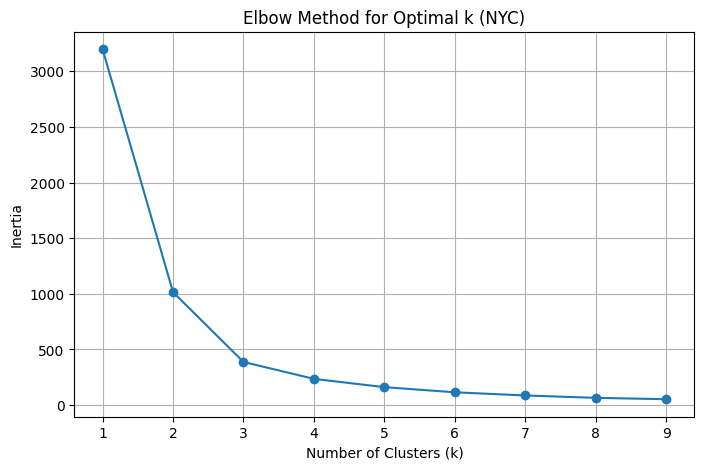

In [64]:
from sklearn.preprocessing import StandardScaler

# Select only the establishment columns
years = [col for col in Nzbp.columns if 'N_est' in col]
scaler = StandardScaler()
standardized_heatmap_data = scaler.fit_transform(Nzbp[years])

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of k values to test
k_values = range(1, 10)
inertia_values = []

# Compute inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(standardized_heatmap_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (NYC)")
plt.xticks(k_values)
plt.grid()
plt.show()


The optimal number of clusters for NYC business establishments is k = 4, as it balances variance reduction and model complexity. Using more than 4 clusters provides diminishing returns in terms of inertia reduction.
